## Global Power Plant Database

### Problem Statement:

 #### Description

##### The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

In [90]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt,joblib
from scipy.stats import zscore
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,average_precision_score
from sklearn.metrics import adjusted_mutual_info_score,balanced_accuracy_score,roc_curve,auc
import warnings
warnings.filterwarnings('ignore')

In [91]:
# Read the dataset
df = pd.read_csv(r"C:\Users\ROHIT RAJAN\Downloads\database_IND.txt")

In [92]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [93]:
df.shape

(907, 27)

In [94]:
df.info

<bound method DataFrame.info of     country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Sola

In [95]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [96]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

#### Finding the Columns with missing data

In [97]:
nacolumns=df.columns[df.isnull().any()]

In [98]:
nacolumns=list(nacolumns)

In [99]:
df.drop(nacolumns,axis=1)

,country,country_long,name,gppd_idnr,capacity_mw,primary_fuel,source,url
0,IND,India,ACME Solar Tower,WRI1020239,2.5,Solar,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,Coal,Ultratech Cement ltd,http://www.ultratechcement.com/
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,Wind,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...
3,IND,India,AGARTALA GT,IND0000001,135.0,Gas,Central Electricity Authority,http://www.cea.nic.in/
4,IND,India,AKALTARA TPP,IND0000002,1800.0,Coal,Central Electricity Authority,http://www.cea.nic.in/
...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,Coal,Central Electricity Authority,http://www.cea.nic.in/
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,Solar,Karnataka Power Corporation Limited,http://karnatakapower.com
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,Wind,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...
905,IND,India,ZAWAR MINES,WRI1019901,80.0,Coal,Hindustan Zinc ltd,http://www.hzlindia.com/


In [100]:
df = df.sample(frac=1, random_state = 0)

#### Finding the columns with missing Data

In [101]:
gclean_df=df.drop(nacolumns,axis=1)

#### Exploratory Analysis and Visualization

#### Looking deeply into the rows and columns

In [102]:
print(len(gclean_df),"Rows")
print(len(gclean_df.columns),"columns")
print(gclean_df.shape, "of Shape")
print(gclean_df.ndim, "Dimension")

907 Rows
8 columns
(907, 8) of Shape
2 Dimension


In [103]:
#What is the number of countries on the data set
gclean_df.country.nunique()

1

In [104]:
groupedcountry=gclean_df.groupby(by='country_long',as_index=False)

In [105]:
countrycapa=groupedcountry[['capacity_mw']].agg(sum)

In [106]:
countrycapa.sort_values('capacity_mw',inplace=True)

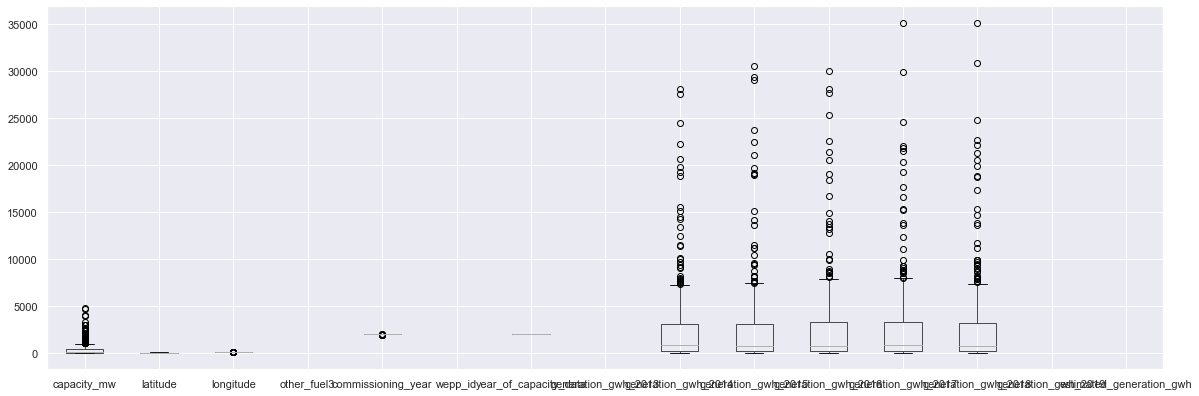

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

#### countries producing Highest electricity are shown above

In [108]:
groupedfuel=gclean_df.groupby(by='primary_fuel',as_index=False)

In [109]:
fuelnum=groupedfuel.size()

#### What are the total number of plants in each type of Primary Fuel

### EDA

#### Univariate analysis

##### Lets plot the distrubution and conuts for targat and feature columns.

Text(0.5, 1.0, 'primary_fuel')

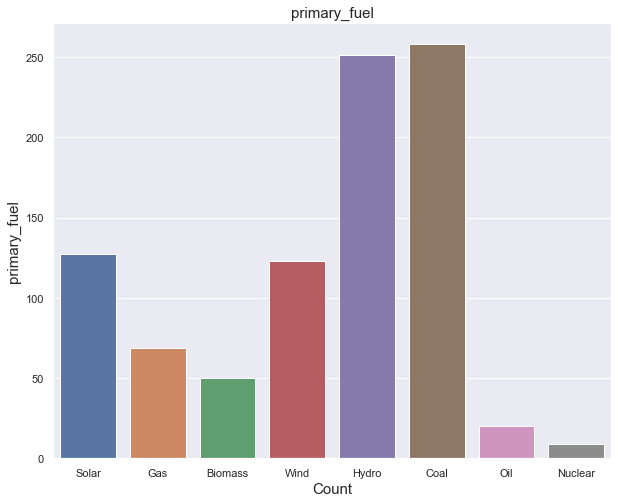

In [111]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,8))
sns.countplot(df['primary_fuel'] )
plt.xlabel('Count', fontsize=15 )
plt.ylabel('primary_fuel', fontsize=15 )
plt.title('primary_fuel', fontsize=15)


Here we can see, most of the power plants are using Coal and Hydro as the primary fuel.
Coal having maximum counts, which indicates most of the power generation plant using coal af primary fuel.
Use of solar and wind also considerable.

In [23]:
fuelnum.sort_values(['size'],ascending=False,inplace=True)
print(fuelnum)

  primary_fuel  size
1         Coal   258
3        Hydro   251
6        Solar   127
7         Wind   123
2          Gas    69
0      Biomass    50
5          Oil    20
4      Nuclear     9


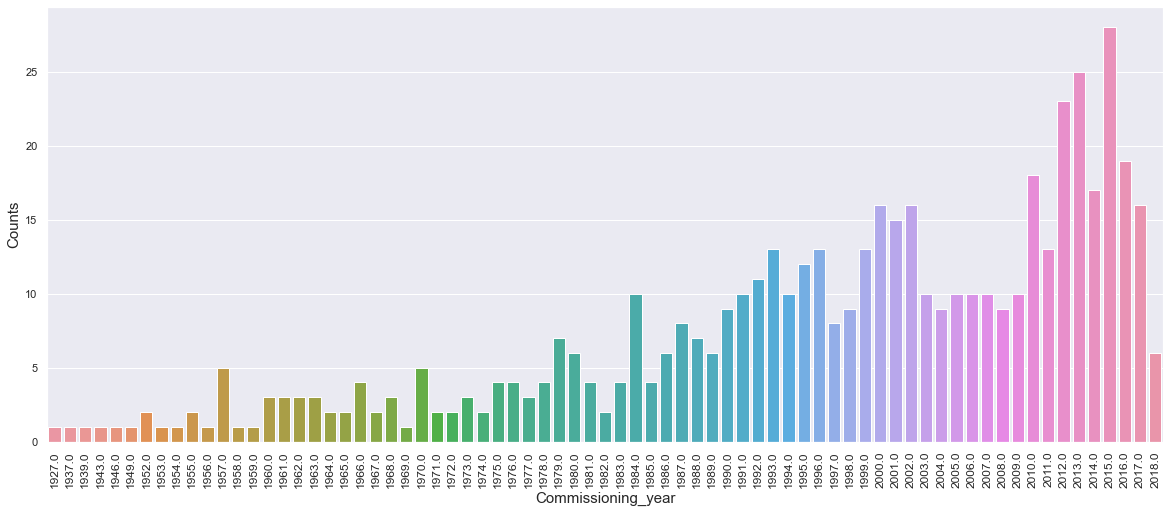

In [112]:
plt.figure(figsize=(20,8))
sns.countplot(df['commissioning_year'])
plt.xlabel('Commissioning_year', fontsize= 15)
plt.ylabel('Counts', fontsize= 15)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=90)
plt.show()

Here we can see first power plant in India starts in 1927.
The count is very low till 1956.
From 1957 to 1983 there is contineous developmet of 3 to 5 power plant every year.
The number increases 1964 with total count of 10.
After 1964 there conutineuos growth in power sector.
In the year 2013 we have maximum number of Power plant, the count is more than 25

In [25]:
df['owner'].value_counts()

Acc Acc ltd                                 4
Sterling Agro Industries ltd.               4
Jk Cement ltd                               4
Jaypee Ltd jccl)                            3
Enercon India Ltd.                          3
                                           ..
Energy Infratech Private Limited            1
Northwest Energy Private Limited (NWEPL)    1
Reliance Power                              1
Gem Sugars ltd                              1
Moser Baer Solar Limited (MBSL)             1
Name: owner, Length: 280, dtype: int64

### Multivariate analysis

In [26]:
import seaborn as sns

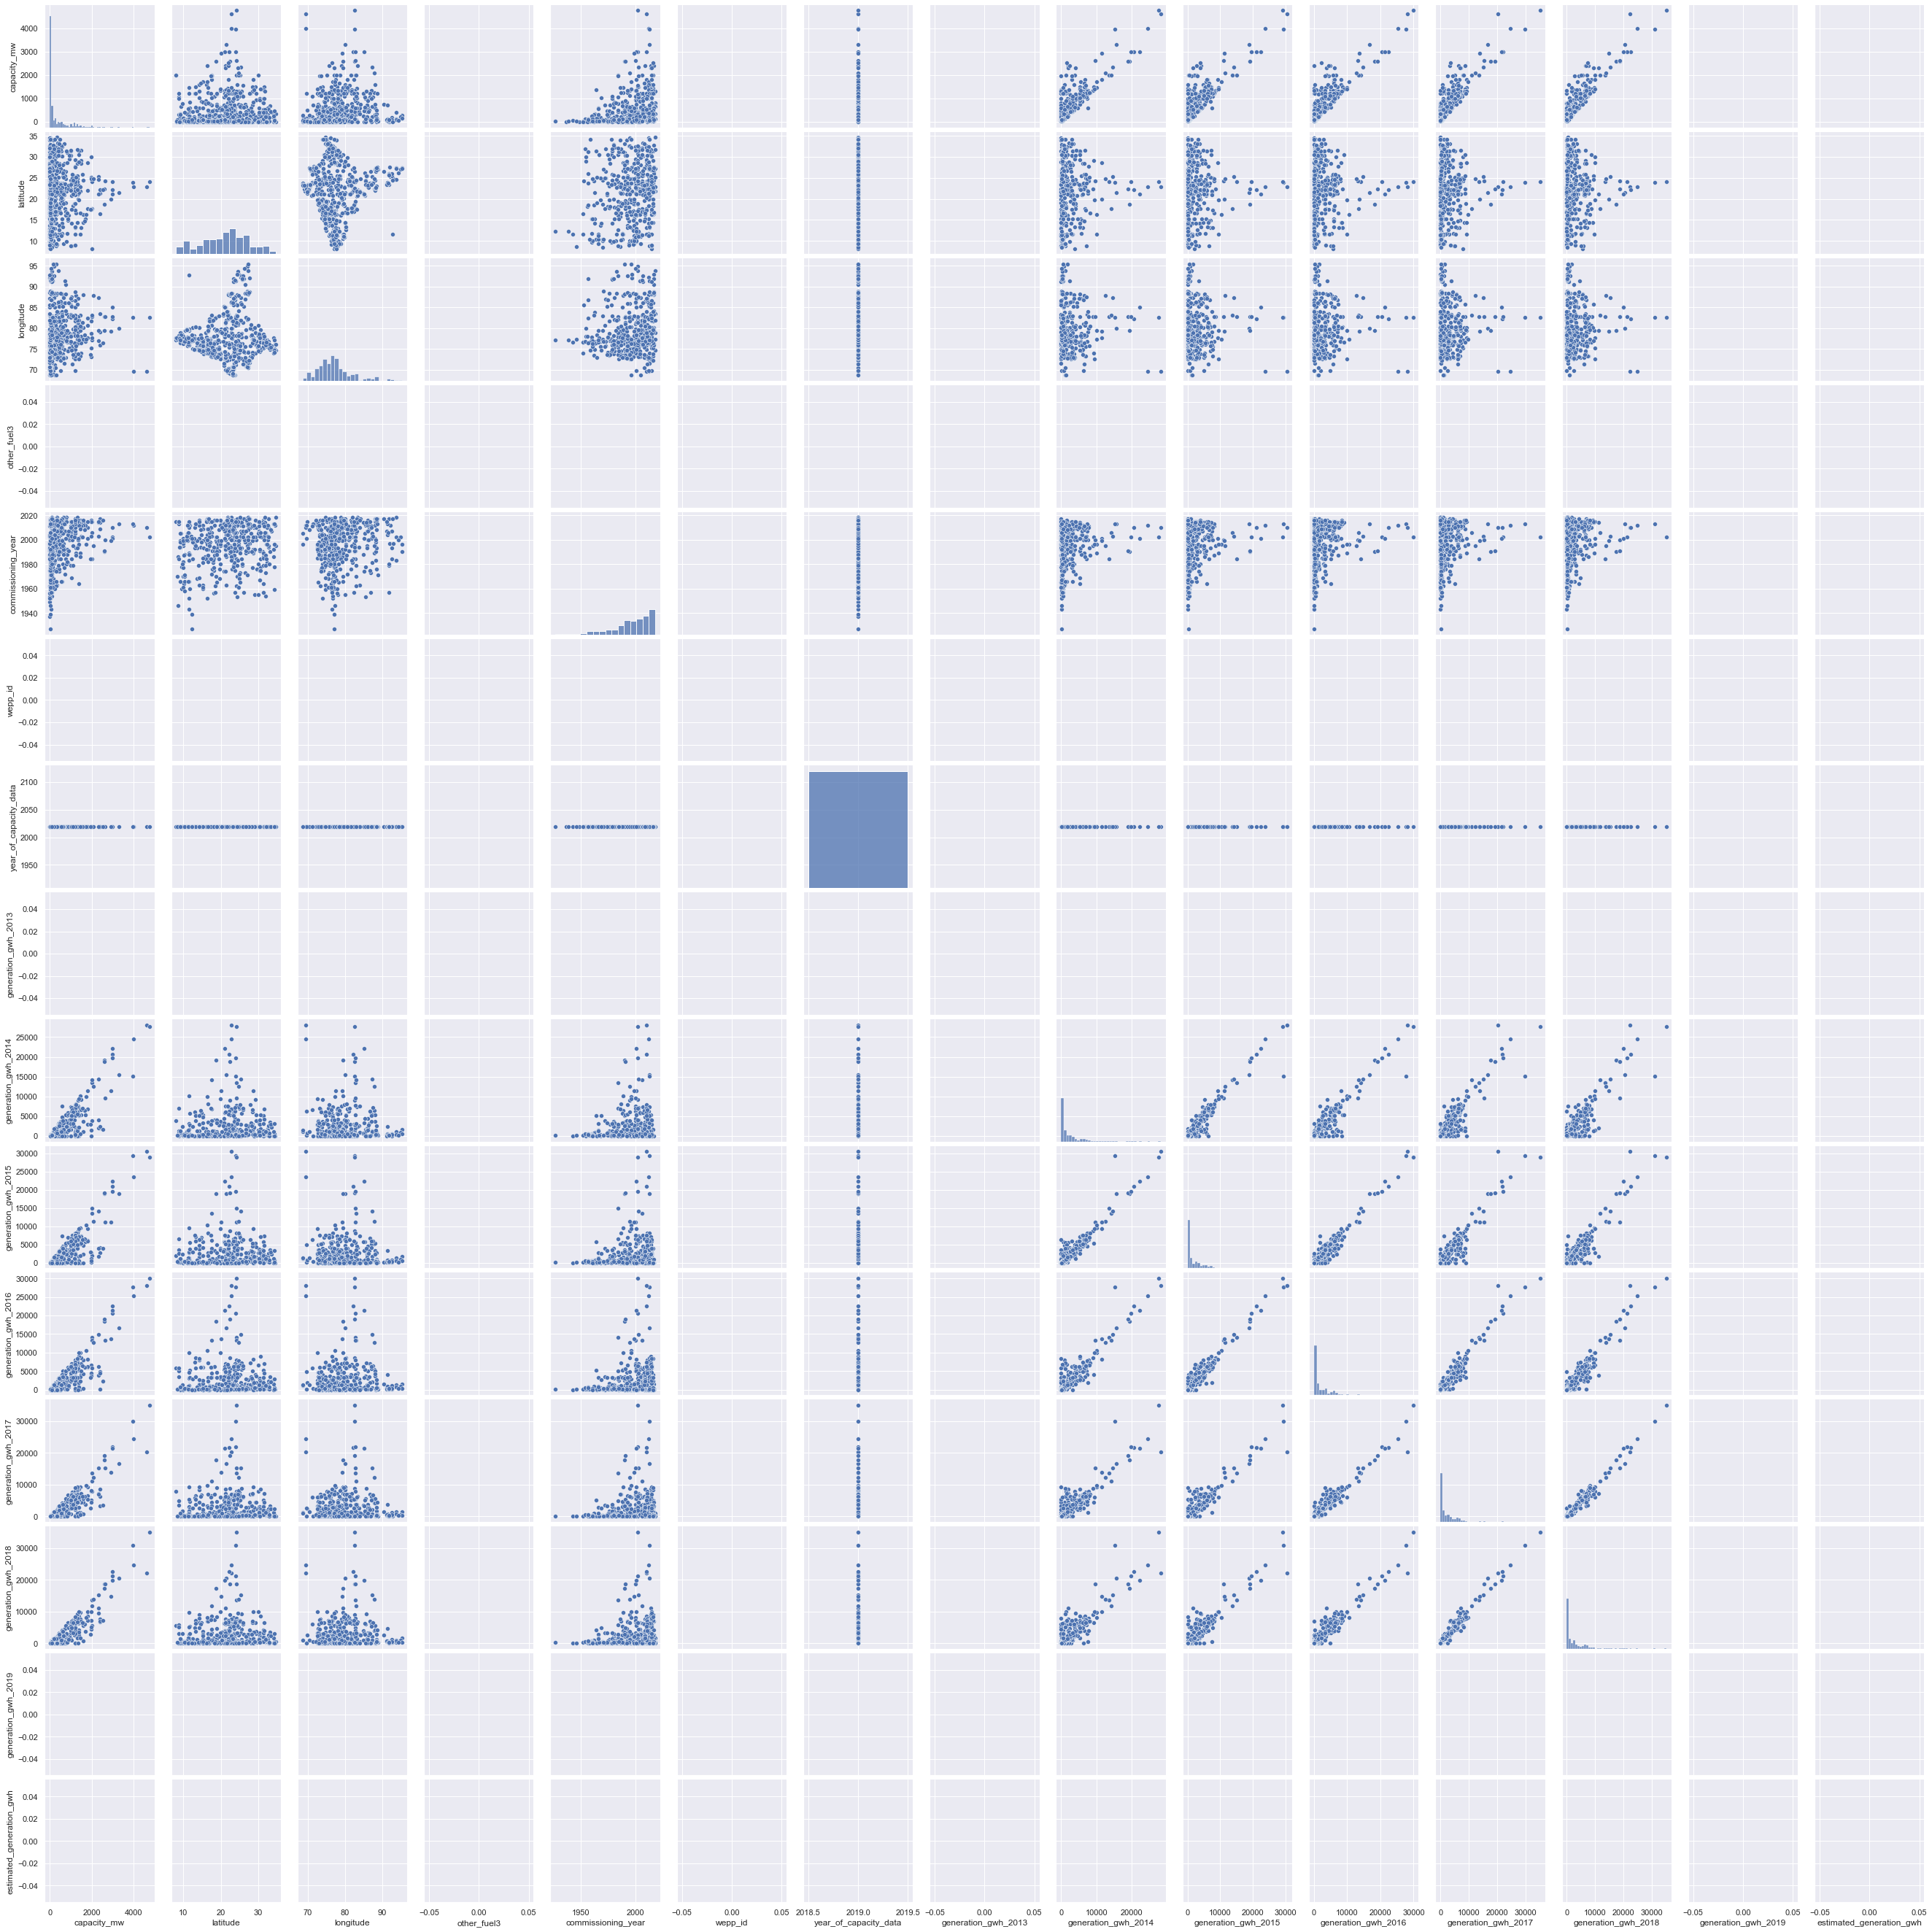

In [27]:
sns.pairplot(df)

### Exploratory Data Analysis Summary

capacity_mw:  As we can see capacity is mostly dependent on Coal.
primary_fuel: Mostly Coal is used as primary fuel.
latitude & longitude : As we can see and understand are not playing very good role in capacity_mw.
commissioning_year: As we can understand from above capacity increases after 2000.
generation_gwh_2013-2017: we can see generation growth is almost same for each year

### Processing Data

As we see and understand some of them are not performing and giving good result, they are gppd_idnr, owner, commissioning_year, so let drop these columns

In [28]:
df.drop(['name','gppd_idnr','owner','commissioning_year'], axis=1, inplace= True)

### Encrypting Target Columns

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['primary_fuel']=le.fit_transform(df['primary_fuel'])

In [30]:
df.head(3)

,country,country_long,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,source,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
251,IND,India,5.0,25.8600,74.6567,6,NaN,NaN,NaN,Amrit Energy Private Limited,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460,IND,India,388.0,18.3879,73.3529,2,NaN,NaN,NaN,Central Electricity Authority,...,2019.0,NaN,NaN,NaN,208.9768,0.0,0.0,NaN,Central Electricity Authority,NaN
496,IND,India,11.2,15.8555,75.1002,0,NaN,NaN,NaN,Shree Sugars ltd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel3,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
capacity_mw,1.000000,0.051309,0.197129,-0.380395,NaN,NaN,NaN,NaN,0.839094,0.844352,0.870620,0.886673,0.901918,NaN,NaN
latitude,0.051309,1.000000,0.036362,-0.010530,NaN,NaN,NaN,NaN,0.060330,0.048610,0.041387,0.040568,0.040476,NaN,NaN
longitude,0.197129,0.036362,1.000000,-0.359060,NaN,NaN,NaN,NaN,0.013511,0.022760,0.050732,0.048678,0.045599,NaN,NaN
primary_fuel,-0.380395,-0.010530,-0.359060,1.000000,NaN,NaN,NaN,NaN,-0.405019,-0.393335,-0.408951,-0.421736,-0.421518,NaN,NaN
other_fuel3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wepp_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,0.839094,0.060330,0.013511,-0.405019,NaN,NaN,NaN,NaN,1.000000,0.961098,0.937060,0.912561,0.902781,NaN,NaN
generation_gwh_2015,0.844352,0.048610,0.022760,-0.393335,NaN,NaN,NaN,NaN,0.961098,1.000000,0.974918,0.940191,0.934371,NaN,NaN


In [32]:
df.drop(['other_fuel3','wepp_id','year_of_capacity_data','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1,inplace= True)

In [33]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.051309,0.197129,-0.380395,0.839094,0.844352,0.870620,0.886673,0.901918
latitude,0.051309,1.000000,0.036362,-0.010530,0.060330,0.048610,0.041387,0.040568,0.040476
longitude,0.197129,0.036362,1.000000,-0.359060,0.013511,0.022760,0.050732,0.048678,0.045599
primary_fuel,-0.380395,-0.010530,-0.359060,1.000000,-0.405019,-0.393335,-0.408951,-0.421736,-0.421518
generation_gwh_2014,0.839094,0.060330,0.013511,-0.405019,1.000000,0.961098,0.937060,0.912561,0.902781
generation_gwh_2015,0.844352,0.048610,0.022760,-0.393335,0.961098,1.000000,0.974918,0.940191,0.934371
generation_gwh_2016,0.870620,0.041387,0.050732,-0.408951,0.937060,0.974918,1.000000,0.972024,0.962073
generation_gwh_2017,0.886673,0.040568,0.048678,-0.421736,0.912561,0.940191,0.972024,1.000000,0.985856
generation_gwh_2018,0.901918,0.040476,0.045599,-0.421518,0.902781,0.934371,0.962073,0.985856,1.000000


<AxesSubplot:>

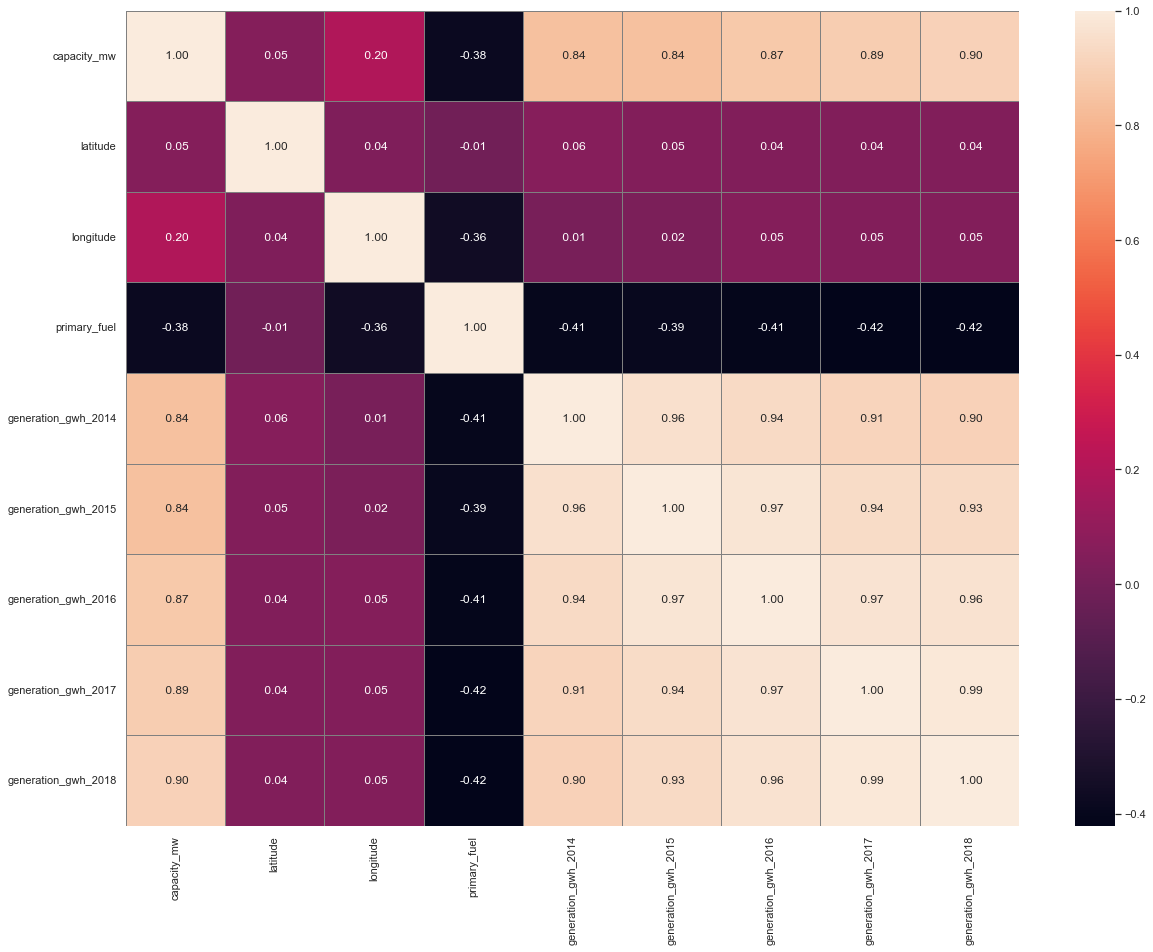

In [34]:
plt.figure(figsize=(20,15))

sns.heatmap(df.corr(),annot= True,linewidths=1,linecolor='grey',fmt=' .2f' )


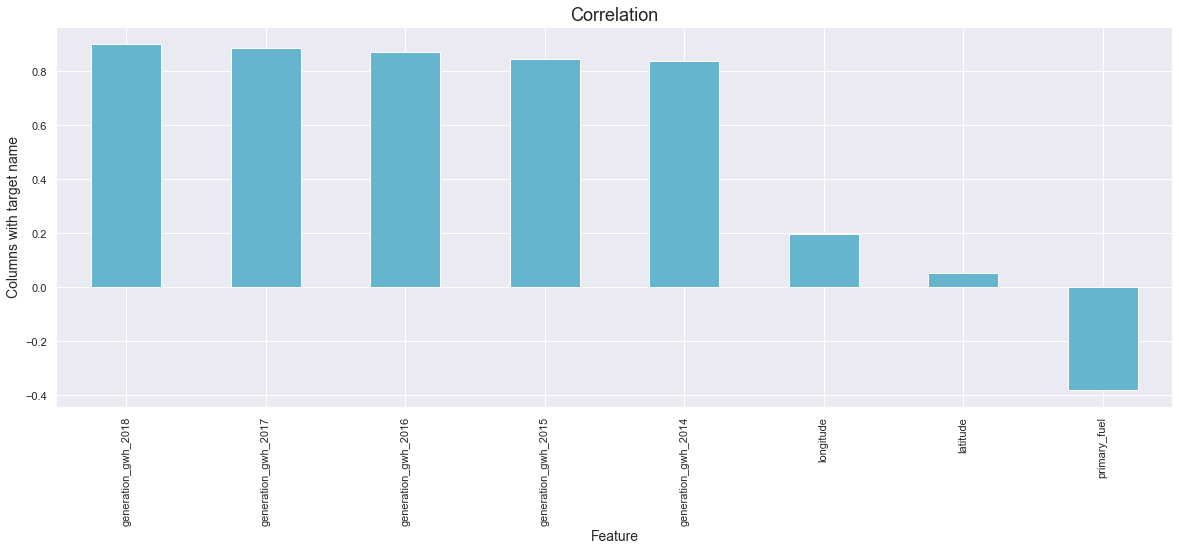

In [35]:
plt.figure(figsize=(20,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Here we can see only primary fuel is negative correlated with capacity megawatt, all othere parameters are having strong positve correlation.

From heat map we can see generation growth columns are highly correlacted with each other.

### Checking the outliers

<AxesSubplot:>

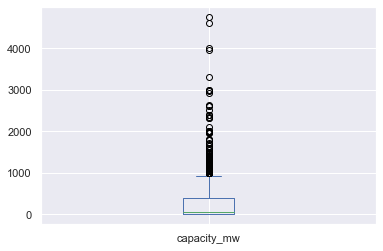

In [36]:
df['capacity_mw'].plot.box()

<AxesSubplot:>

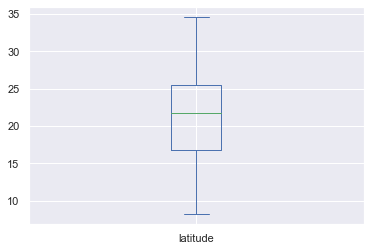

In [37]:
df['latitude'].plot.box()

<AxesSubplot:>

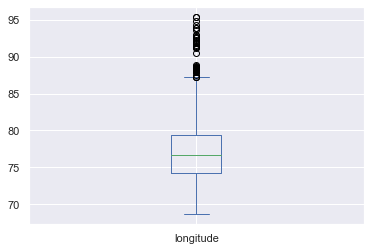

In [38]:
df['longitude'].plot.box()

<AxesSubplot:>

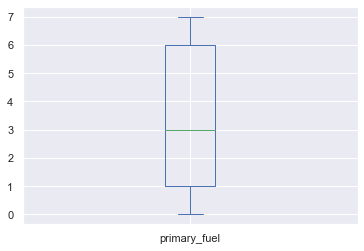

In [39]:
df['primary_fuel'].plot.box()

<AxesSubplot:>

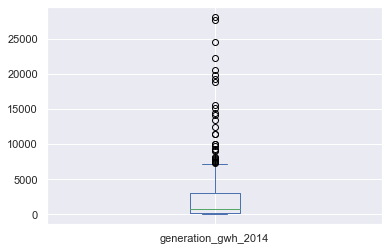

In [40]:
df['generation_gwh_2014'].plot.box()

<AxesSubplot:>

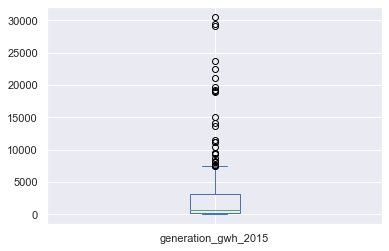

In [41]:
df['generation_gwh_2015'].plot.box()

<AxesSubplot:>

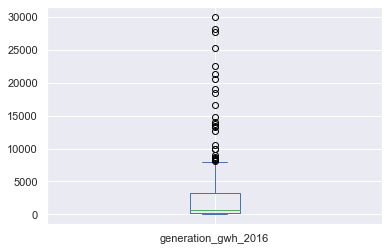

In [42]:
df['generation_gwh_2016'].plot.box()

<AxesSubplot:>

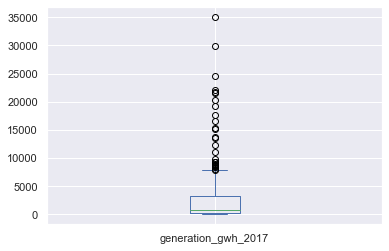

In [43]:
df['generation_gwh_2017'].plot.box()

<AxesSubplot:>

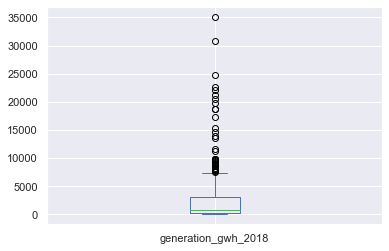

In [44]:
df['generation_gwh_2018'].plot.box()

As we can see above in boxplots that there are outliers which  are mostly present in generation_gwh columns.

<AxesSubplot:title={'center':'comparison between capacity_mw and generation_gwh_2014'}, xlabel='capacity_mw', ylabel='generation_gwh_2014'>

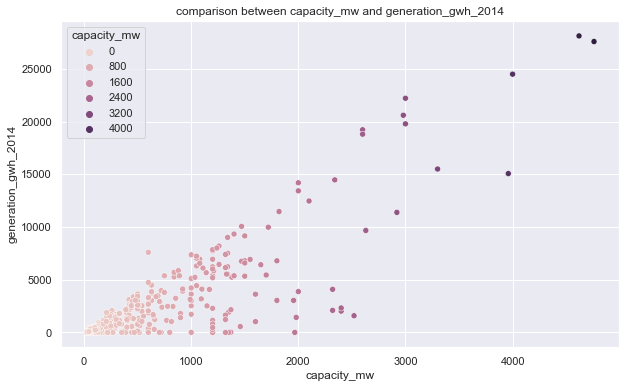

In [45]:
import seaborn as sn
plt.figure(figsize=[10,6])
plt.title("comparison between capacity_mw and generation_gwh_2014")
sn.scatterplot(df['capacity_mw'],df['generation_gwh_2014'],hue=df["capacity_mw"])

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [47]:
df['primary_fuel']=le.fit_transform(df['primary_fuel'])
df['geolocation_source']=le.fit_transform(df['geolocation_source'])
df['source']=le.fit_transform(df['source'])

In [48]:
df.head()

,country,country_long,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
251,IND,India,5.0,25.8600,74.6567,6,NaN,NaN,8,http://www.rrecl.com/PDF/Details%0Rajasthan.pdf,0,NaN,NaN,NaN,NaN,NaN,NaN
460,IND,India,388.0,18.3879,73.3529,2,NaN,NaN,22,http://www.cea.nic.in/,2,NaN,NaN,208.9768,0.0000,0.00000,Central Electricity Authority
496,IND,India,11.2,15.8555,75.1002,0,NaN,NaN,148,http://www.renukasugars.com/,2,NaN,NaN,NaN,NaN,NaN,NaN
485,IND,India,20.0,26.8051,70.7381,7,NaN,NaN,21,https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1...,2,NaN,NaN,NaN,NaN,NaN,NaN
144,IND,India,36.0,32.7369,76.2477,3,NaN,NaN,22,http://www.cea.nic.in/,2,NaN,NaN,NaN,79.0229,136.76275,Central Electricity Authority


In [60]:
df.drop(['country'],axis=1,inplace=True)

In [61]:
df.drop(['country_long'],axis=1,inplace=True)

In [62]:
df.drop(['other_fuel1'],axis=1,inplace=True)

In [63]:
df.drop(['url'],axis=1,inplace=True)

In [64]:
df.drop(['generation_data_source'],axis=1,inplace=True)

In [65]:
df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel             int64
source                   int32
geolocation_source       int32
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

Now all the datas converted from string to numerical data



In [66]:
df.shape

(907, 11)

## Outlier Remover

In [67]:
from scipy.stats import zscore

In [85]:
from scipy.stats import zscore
z= np.abs(zscore(df))

In [118]:
threshold= 3 
print(np.where(z>1))

(array([], dtype=int64), array([], dtype=int64))


In [119]:
Loss_percentage=(908-866)/908*100
print(Loss_percentage)

4.6255506607929515


In [75]:
df.shape

(0, 11)

In [76]:
df.head(2)

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018


In [113]:
df.skew()

capacity_mw                 3.123576
latitude                   -0.145866
longitude                   1.112646
other_fuel3                      NaN
commissioning_year         -1.067949
wepp_id                          NaN
year_of_capacity_data       0.000000
generation_gwh_2013              NaN
generation_gwh_2014         3.342707
generation_gwh_2015         3.665904
generation_gwh_2016         3.512370
generation_gwh_2017         3.566070
generation_gwh_2018         3.476298
generation_gwh_2019              NaN
estimated_generation_gwh         NaN
dtype: float64